## Import Libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%matplotlib inline

pd.set_option('display.max_columns', 250)
plt.style.use('seaborn-v0_8-pastel') 

## Checking Dataset

In [1]:
df_titanic = pd.read_csv("../../Data/titanic.csv")

In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [3]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
#Filling in NaN age values with the average age of passengers.
df_titanic['age'].fillna((df_titanic['age'].mean()), inplace = True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Analysis

### Initial Visualizations

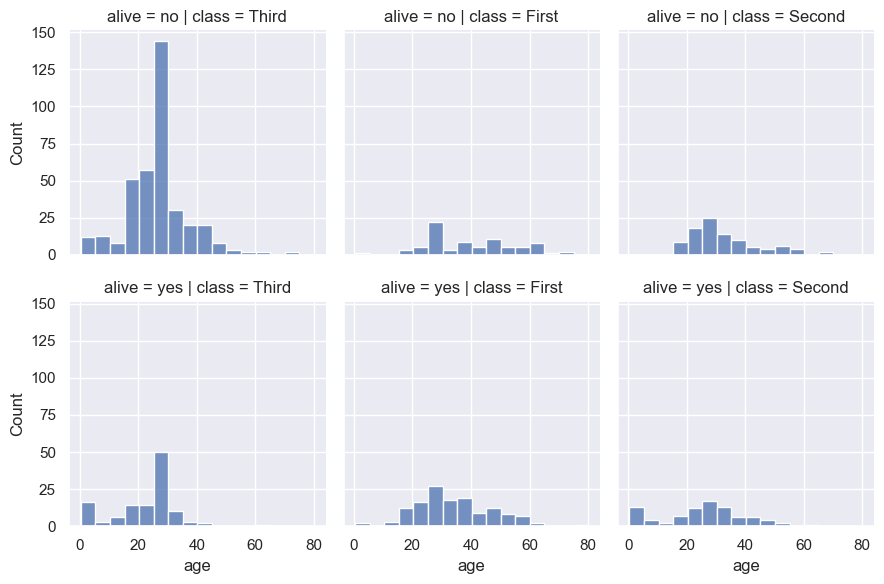

In [6]:
sns.set_theme(style = 'darkgrid')
sns.displot(df_titanic, x = 'age', col = 'class', row = 'alive', binwidth = 5, height = 3)
plt.show()

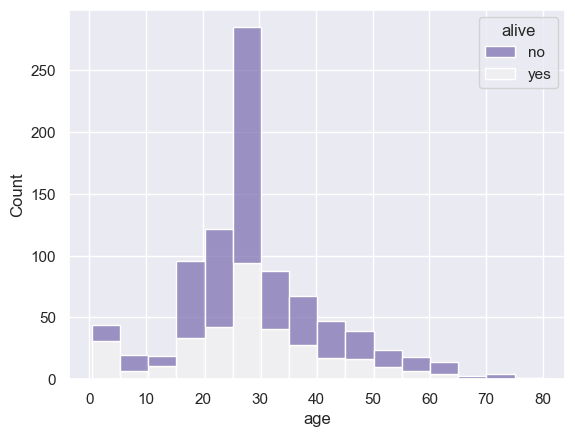

In [12]:
sns.histplot(df_titanic, x = 'age', hue = 'alive', multiple = 'stack', palette = 'light:m_r', binwidth = 5)
plt.show()

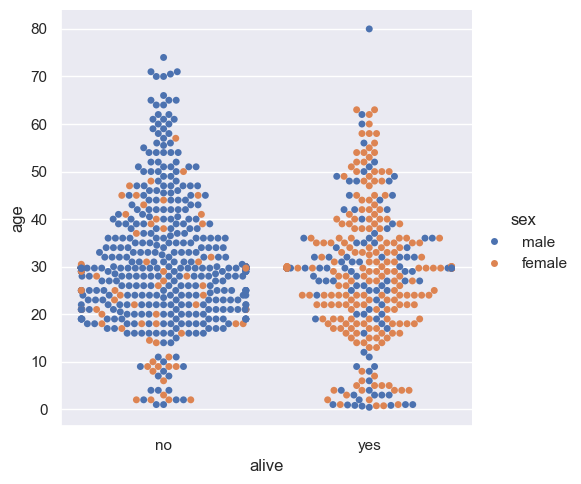

In [26]:
sns.catplot(df_titanic, x = 'alive', y = 'age', hue = 'sex', kind = 'swarm')
plt.show()

### Good Visualization #1

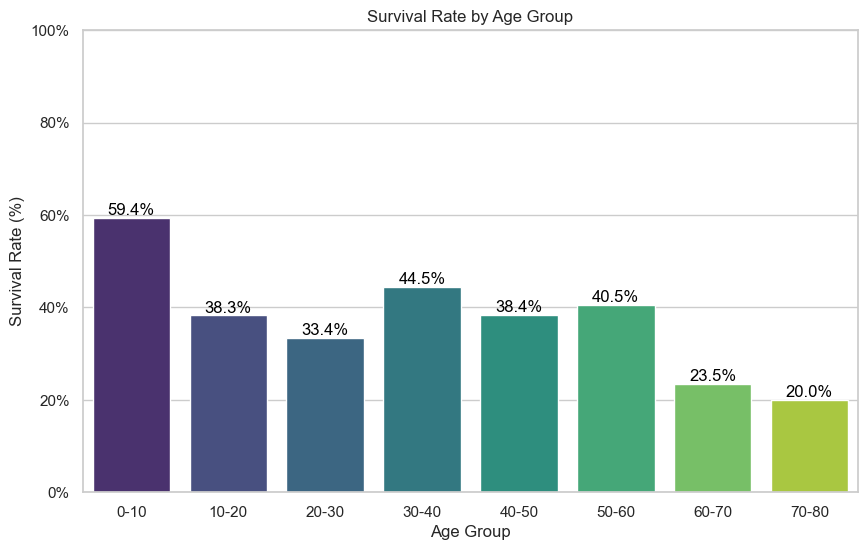

In [38]:
# Define age groups and corresponding labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df_titanic['Age_bin'] = pd.cut(df_titanic['age'], bins=bins, labels=labels, include_lowest=True)

# Calculate the survival rate for each age group
survival_rate = df_titanic.groupby('Age_bin')['survived'].mean().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Age_bin', y='survived', data=survival_rate, palette='viridis')

# Add percentages above bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

#Format y-axis as percentages
ax.yaxis.set_major_formatter(PercentFormatter(1))

ax.set_title("Survival Rate by Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival Rate (%)")
plt.ylim(0, 1)  # Set y-axis limits to reflect proportions (0 to 1)

plt.show()

### Good Visualization #2

### Bad Visualization #1

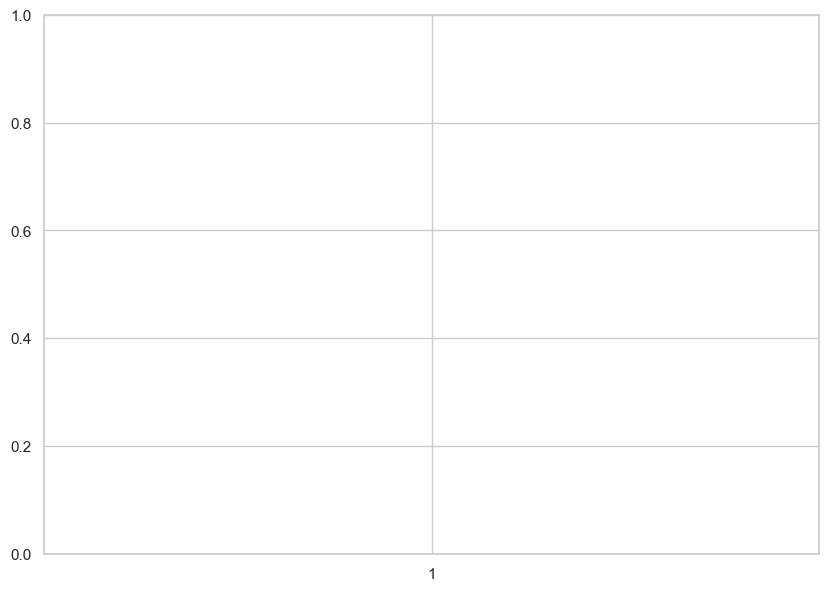

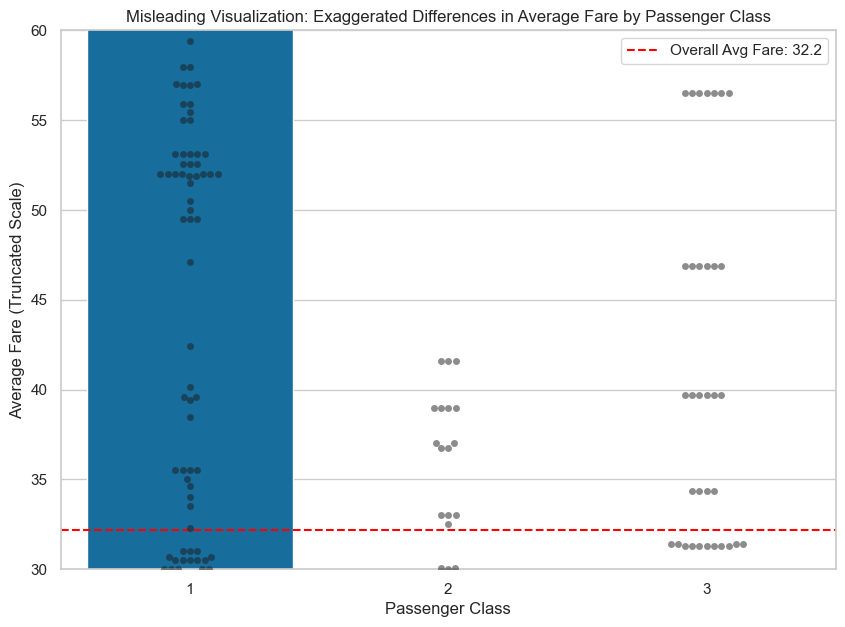

In [40]:
# Calculate overall average fare for all passengers
overall_avg_fare = df_titanic['fare'].mean()

# Calculate average fare and standard error (std/√n) by passenger class
avg_fare = df_titanic.groupby('pclass')['fare'].agg(['mean', 'count', 'std']).reset_index()
avg_fare['sem'] = avg_fare['std'] / np.sqrt(avg_fare['count'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))

# Create a bar plot for the average fare by passenger class with error bars
ax = sns.barplot(x='pclass', y='mean', data=avg_fare, palette="colorblind")

# Overlay a swarm plot to show individual fare data points
sns.swarmplot(x='pclass', y='fare', data=df_titanic, color='k', alpha=0.5, ax=ax)

# Intentionally set the y-axis to a truncated range to exaggerate differences
plt.ylim(30, 60)

# Add a horizontal dashed line for the overall average fare
ax.axhline(overall_avg_fare, ls='--', color='red', label=f'Overall Avg Fare: {overall_avg_fare:.1f}')

# Annotate each bar with its average fare and the percentage difference from the overall average
for i, row in avg_fare.iterrows():
    pct_diff = (row['mean'] - overall_avg_fare) / overall_avg_fare * 100
    ax.annotate(f"{row['mean']:.1f}\n({pct_diff:+.1f}%)", 
                xy=(i, row['mean']), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', 
                va='bottom', 
                fontsize=10, 
                color='blue')

# Add extra details: title, axis labels, and legend
ax.set_title("Misleading Visualization: Exaggerated Differences in Average Fare by Passenger Class")
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Average Fare (Truncated Scale)")
ax.legend()

plt.show()

### Bad Visualization #2